
🔍 First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

📏 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), obj

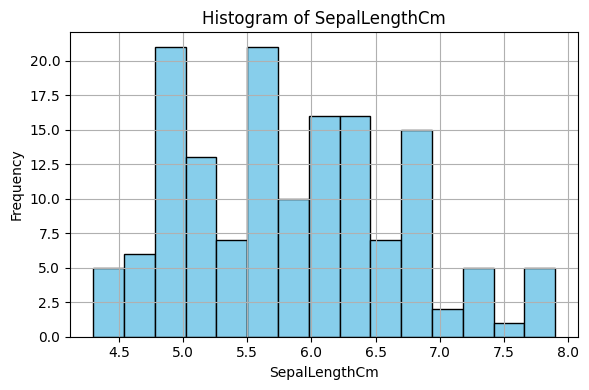

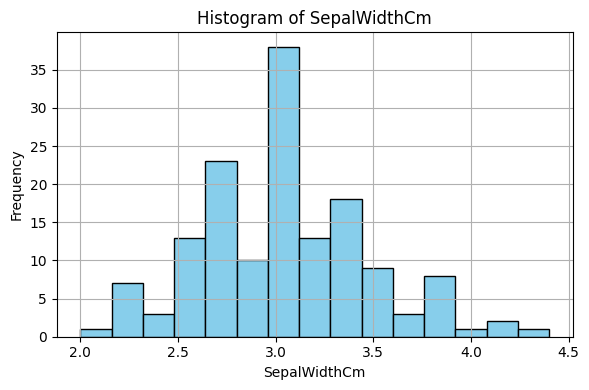

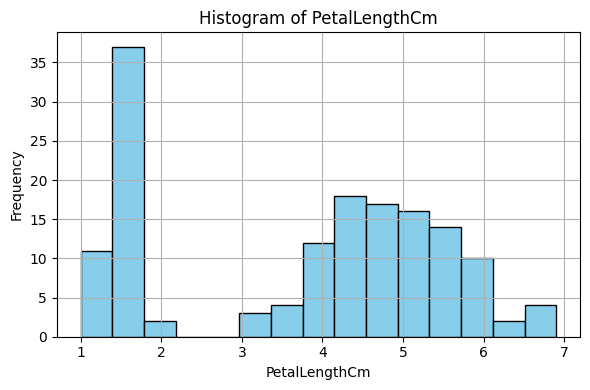

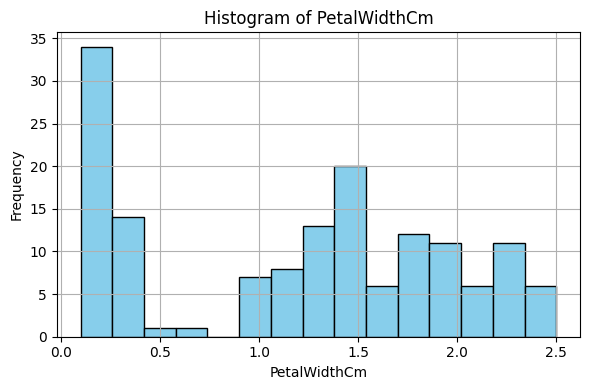


📦 Plotting Boxplots:


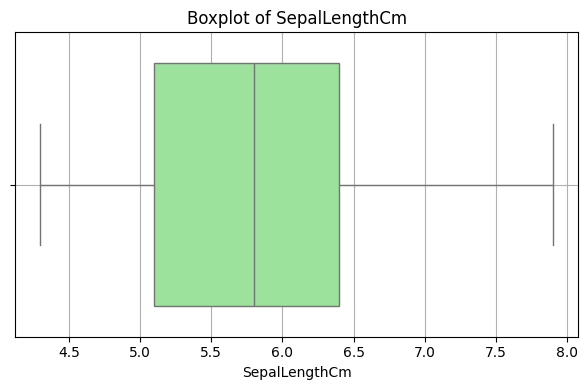

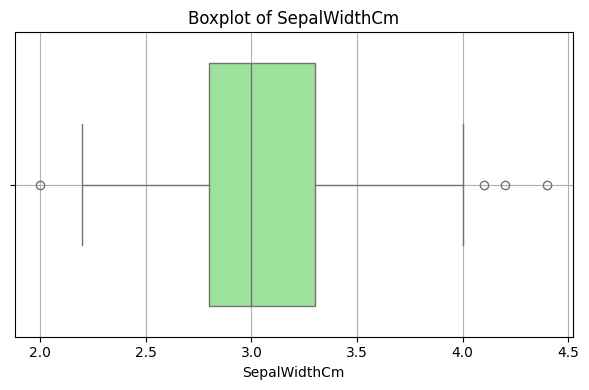

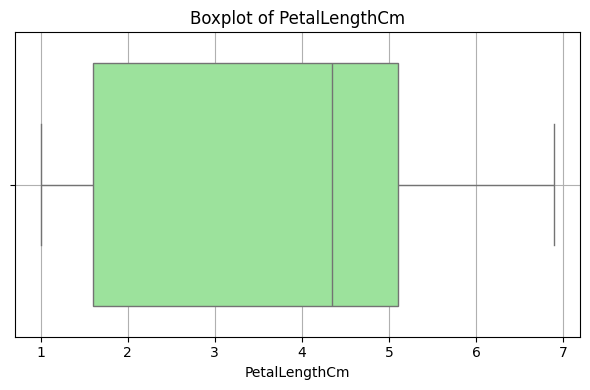

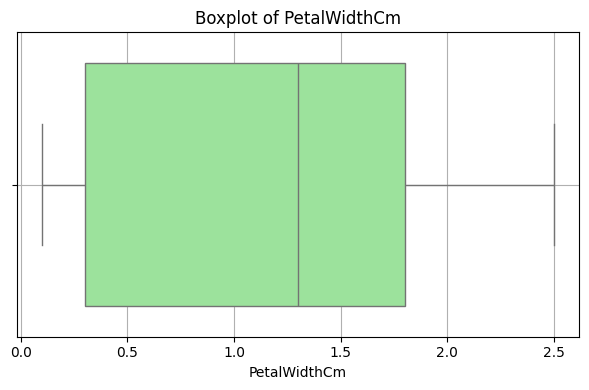

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
file_path = '/content/Iris.csv'
df = pd.read_csv(file_path)

# Step 2: Initial inspection
print("\n🔍 First 5 rows of the dataset:")
print(df.head())

print("\n📏 Dataset Info:")
print(df.info())

# Step 3: Data Cleaning
# Drop "Id" column if exists (not a feature)
if 'Id' in df.columns:
    df.drop(columns=['Id'], inplace=True)

# Check for missing values
print("\n🧼 Checking for missing values:")
print(df.isnull().sum())

# Summary statistics
print("\n📊 Summary statistics:")
print(df.describe())

# Step 4: Feature Types
print("\n📋 Feature Names and Types:")
for col in df.columns:
    dtype = df[col].dtype
    ftype = 'Numeric' if pd.api.types.is_numeric_dtype(df[col]) else 'Nominal'
    print(f"{col}: {ftype}")

# Step 5: Histograms (plotted one by one, with space between them)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

print("\n📈 Plotting Histograms:")
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=15, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Step 6: Boxplots (plotted one by one, with space between them)
print("\n📦 Plotting Boxplots:")
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Step 1: Load and clean the dataset
df = pd.read_csv('/content/Iris.csv')

# Drop the ID column if exists
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

# Step 2: Prepare features and labels
X = df.drop(columns=['Species'])   # features
y = df['Species']                 # labels

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Naïve Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Confusion Matrix
labels = y.unique()  # ensure proper label order
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Print confusion matrix with labels
print("\n📊 Confusion Matrix:")
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print(cm_df)

# Step 7: Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"\n✅ Accuracy: {accuracy:.2f}")
print(f"❌ Error Rate: {error_rate:.2f}")
print(f"🎯 Precision: {precision:.2f}")
print(f"📢 Recall: {recall:.2f}")

# Optional: Compute TP, FP, TN, FN manually (for each class if needed)
def compute_tp_fp_fn_tn(cm):
    results = {}
    total = cm.sum()
    for i, label in enumerate(labels):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = total - (TP + FP + FN)
        results[label] = {'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN}
    return results

metrics_per_class = compute_tp_fp_fn_tn(cm)
print("\n🔍 TP, FP, FN, TN per class:")
for cls, metrics in metrics_per_class.items():
    print(f"{cls}: {metrics}")



📊 Confusion Matrix:
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               10                0               0
Iris-versicolor            0                9               0
Iris-virginica             0                0              11

✅ Accuracy: 1.00
❌ Error Rate: 0.00
🎯 Precision: 1.00
📢 Recall: 1.00

🔍 TP, FP, FN, TN per class:
Iris-setosa: {'TP': np.int64(10), 'FP': np.int64(0), 'FN': np.int64(0), 'TN': np.int64(20)}
Iris-versicolor: {'TP': np.int64(9), 'FP': np.int64(0), 'FN': np.int64(0), 'TN': np.int64(21)}
Iris-virginica: {'TP': np.int64(11), 'FP': np.int64(0), 'FN': np.int64(0), 'TN': np.int64(19)}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Load the dataset
iris_df = pd.read_csv("/content/Iris.csv")

# Drop the ID column
iris_df = iris_df.drop(columns=["Id"])

# Encode the class labels
le = LabelEncoder()
iris_df['Species'] = le.fit_transform(iris_df['Species'])

# Split features and target
X = iris_df.drop("Species", axis=1)
y = iris_df["Species"]

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naïve Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Function to compute metrics
def compute_metrics(conf_matrix):
    metrics = []
    num_classes = conf_matrix.shape[0]
    for i in range(num_classes):
        TP = conf_matrix[i, i]
        FP = conf_matrix[:, i].sum() - TP
        FN = conf_matrix[i, :].sum() - TP
        TN = conf_matrix.sum() - (TP + FP + FN)
        Accuracy = (TP + TN) / conf_matrix.sum()
        Error_rate = 1 - Accuracy
        Precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        Recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        metrics.append({
            "Class": i,
            "TP": TP,
            "FP": FP,
            "TN": TN,
            "FN": FN,
            "Accuracy": round(Accuracy, 3),
            "Error Rate": round(Error_rate, 3),
            "Precision": round(Precision, 3),
            "Recall": round(Recall, 3)
        })
    return metrics

# Display metrics
results = compute_metrics(conf_matrix)
results_df = pd.DataFrame(results)
print("\nPerformance Metrics:\n", results_df)


Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Performance Metrics:
    Class  TP  FP  TN  FN  Accuracy  Error Rate  Precision  Recall
0      0  19   0  26   0     1.000       0.000      1.000   1.000
1      1  12   0  32   1     0.978       0.022      1.000   0.923
2      2  13   1  31   0     0.978       0.022      0.929   1.000


=== Feature Types ===
Id: numeric
SepalLengthCm: numeric
SepalWidthCm: numeric
PetalLengthCm: numeric
PetalWidthCm: numeric
Species: nominal

=== Generating Histograms ===


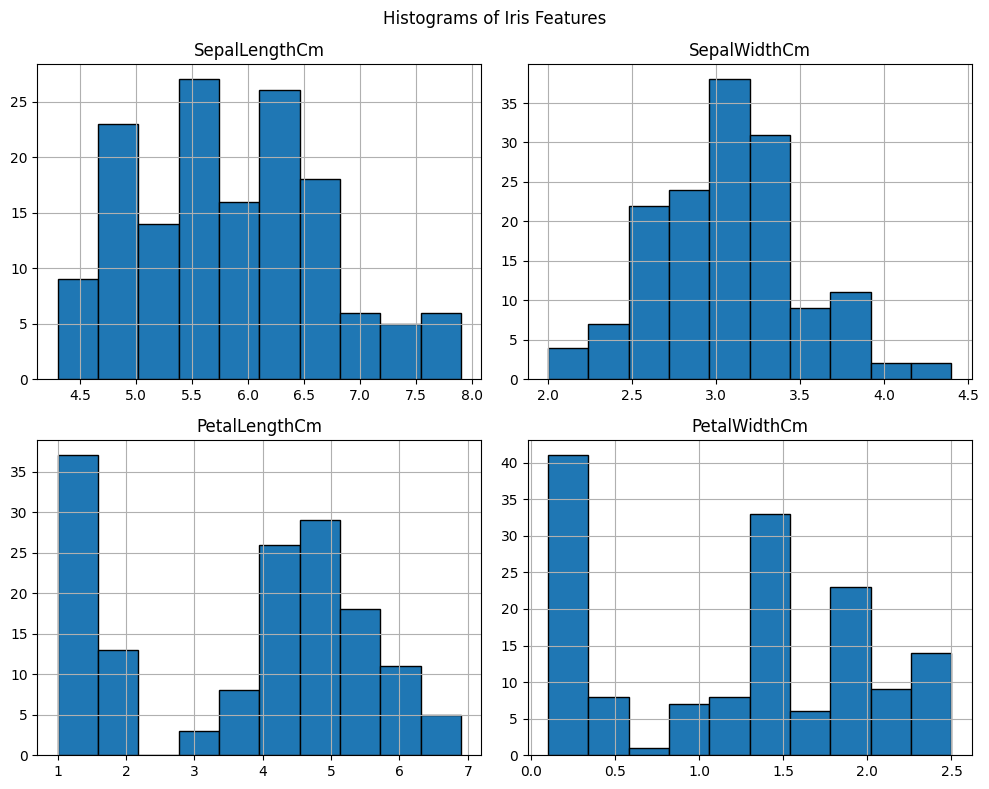


=== Generating Box Plots ===


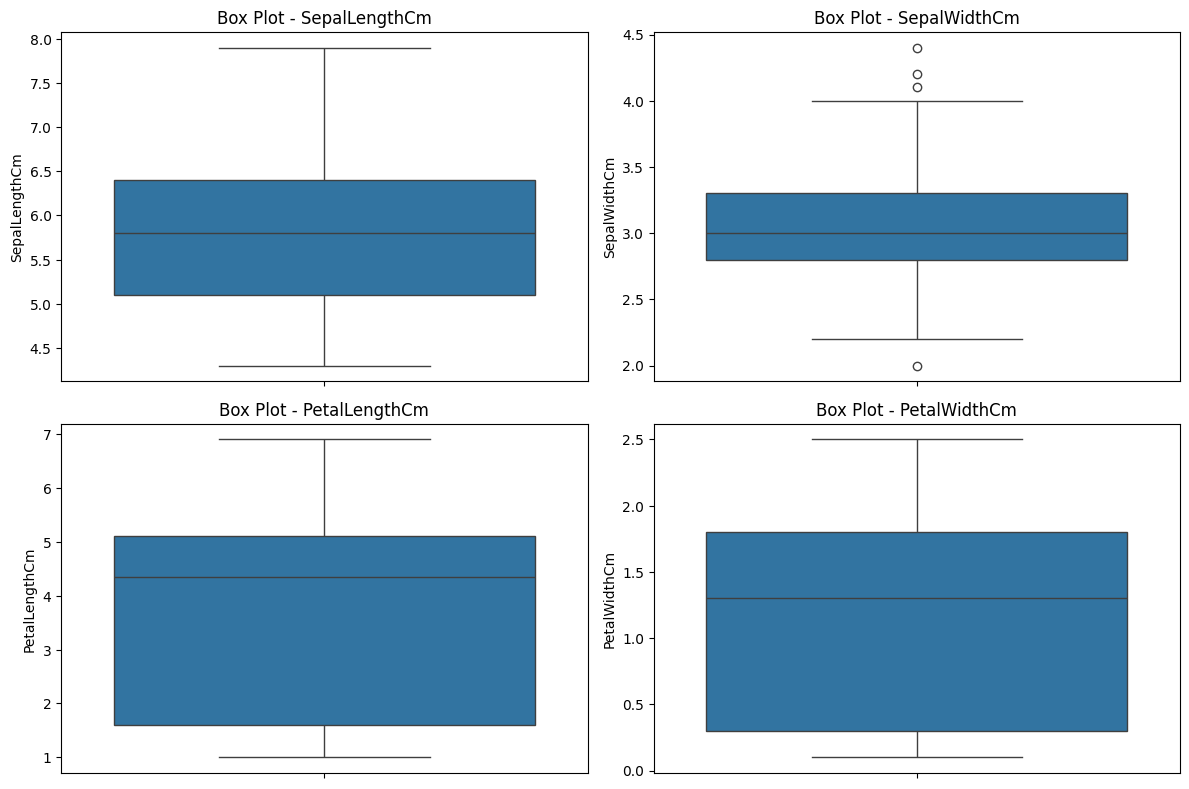

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Iris.csv")

# 1. List features and their types
print("=== Feature Types ===")
feature_types = df.dtypes
for column, dtype in feature_types.items():
    ftype = 'numeric' if pd.api.types.is_numeric_dtype(dtype) else 'nominal'
    print(f"{column}: {ftype}")

# Drop 'Id' since it's just an identifier
df = df.drop(columns=["Id"])

# 2. Create histograms for each numeric feature
print("\n=== Generating Histograms ===")
df.hist(edgecolor='black', figsize=(10, 8))
plt.suptitle("Histograms of Iris Features")
plt.tight_layout()
plt.show()

# 3. Create box plots for each numeric feature
print("\n=== Generating Box Plots ===")
plt.figure(figsize=(12, 8))
for idx, column in enumerate(df.columns[:-1], 1):  # Exclude 'Species'
    plt.subplot(2, 2, idx)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot - {column}')
plt.tight_layout()
plt.show()
